In [16]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import alg_functions as algfn
import calendar
import os
import pickle
import seaborn as sns


In [3]:
symbol = 'NSE:NIFTY50-INDEX'
download_dir = '../download/'

In [4]:
# Get a list of all .csv.gz files in the pred_dir directory that match the model_version
file_list = glob.glob(f"{download_dir}*{symbol}*.csv*")

# Initialize an empty DataFrame to store the merged data
df = pd.DataFrame()

# Iterate over the file list and read each file into a DataFrame, then merge it with the df DataFrame
for file in file_list:
    data = pd.read_csv(file)
    df = pd.concat([df, data], ignore_index=True)
# Convert 'time' column to datetime format (if not already)
df['time'] = pd.to_datetime(df['time'])
df.sort_values(by='time', inplace=True)

df['date'] = pd.to_datetime(df['time']).dt.date



In [6]:
#Keep data after 2.30pm
df = df[df['time'].dt.time >= pd.to_datetime('14:30').time()]
df.reset_index(drop=True, inplace=True)

In [8]:
#Group the DataFrame by 'date' and find the last close,high,low value for each group
close_by_dates = df.groupby('date')['close'].last()
open_by_dates = df.groupby('date')['open'].first()
high_by_dates = df.groupby('date')['high'].max()
low_by_dates = df.groupby('date')['low'].min()


In [9]:
df['date_next'] = df['date']
df['close_next'] = df['date_next'].map(close_by_dates)
df['high_next'] = df['date_next'].map(high_by_dates)
df['low_next'] = df['date_next'].map(low_by_dates)


/tmp/ipykernel_24120/780420202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_next'] = df['date']
/tmp/ipykernel_24120/780420202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_next'] = df['date_next'].map(close_by_dates)
/tmp/ipykernel_24120/780420202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [11]:
df = df.groupby('date').head(1)
df

,time,open,high,low,close,volume,date,date_next,close_next,high_next,low_next
0,2015-06-03 14:30:00,8115.60,8116.15,8110.90,8114.05,0,2015-06-03,2015-06-03,8148.55,8153.20,8107.40
60,2015-06-04 14:30:00,8112.95,8113.25,8106.40,8106.75,0,2015-06-04,2015-06-04,8136.95,8141.55,8101.85
120,2015-06-05 14:30:00,8181.85,8183.75,8181.15,8182.15,0,2015-06-05,2015-06-05,8113.90,8188.30,8105.85
180,2015-06-08 14:30:00,8077.35,8078.10,8073.55,8076.55,0,2015-06-08,2015-06-08,8036.95,8078.10,8030.65
240,2015-06-09 14:30:00,8024.05,8024.80,8021.05,8022.40,0,2015-06-09,2015-06-09,8015.45,8033.05,8005.50
...,...,...,...,...,...,...,...,...,...,...,...
124771,2023-10-18 14:30:00,19704.60,19706.65,19702.75,19704.45,0,2023-10-18,2023-10-18,19668.45,19706.65,19659.95
124831,2023-10-19 14:30:00,19641.95,19646.60,19636.15,19638.75,0,2023-10-19,2023-10-19,19611.90,19652.55,19601.60
124891,2023-10-20 14:30:00,19540.25,19542.45,19538.90,19540.00,0,2023-10-20,2023-10-20,19541.75,19555.05,19526.50
124951,2023-10-23 14:30:00,19429.05,19432.50,19428.75,19430.35,0,2023-10-23,2023-10-23,19278.45,19432.50,19257.85


In [28]:
df['date'] = pd.to_datetime(df['date'])
df['dayofweek'] = df['date'].dt.dayofweek
df = df[df['dayofweek'] == 3] #3 is Thursday
df

/tmp/ipykernel_24120/1936907663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_24120/1936907663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['date'].dt.dayofweek


,time,open,high,low,close,volume,date,date_next,close_next,high_next,low_next,max_up_points,max_down_points,close_points,dayofweek
60,2015-06-04 14:30:00,8112.95,8113.25,8106.40,8106.75,0,2015-06-04,2015-06-04,8136.95,8141.55,8101.85,34.80,4.90,30.20,3
360,2015-06-11 14:30:00,8003.20,8003.20,7999.15,8001.40,0,2015-06-11,2015-06-11,7964.85,8006.20,7958.45,4.80,42.95,-36.55,3
660,2015-06-18 14:30:00,8180.50,8180.70,8174.80,8174.80,0,2015-06-18,2015-06-18,8178.35,8185.20,8157.70,10.40,17.10,3.55,3
960,2015-06-25 14:30:00,8402.50,8402.80,8400.65,8401.25,0,2015-06-25,2015-06-25,8415.05,8423.05,8385.20,21.80,16.05,13.80,3
1260,2015-07-02 14:30:00,8452.85,8452.85,8447.70,8451.45,0,2015-07-02,2015-07-02,8440.95,8460.90,8433.30,9.45,18.15,-10.50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123660,2023-09-21 14:30:00,19730.10,19733.20,19728.50,19731.05,0,2023-09-21,2023-09-21,19742.35,19754.45,19711.65,23.40,19.40,11.30,3
123991,2023-09-28 14:30:00,19545.00,19547.15,19539.10,19539.65,0,2023-09-28,2023-09-28,19553.30,19557.50,19492.10,17.85,47.55,13.65,3
124231,2023-10-05 14:30:00,19546.20,19549.00,19546.20,19547.70,0,2023-10-05,2023-10-05,19546.60,19564.75,19532.40,17.05,15.30,-1.10,3
124531,2023-10-12 14:30:00,19798.65,19805.05,19798.05,19803.00,0,2023-10-12,2023-10-12,19782.90,19807.30,19777.10,4.30,25.90,-20.10,3


In [32]:
df['max_up_points'] = df['high_next'] - df['close']
df['max_down_points'] = df['low_next'] - df['close']
df['close_points'] = df['close_next'] - df['close']

/tmp/ipykernel_24120/1881099943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_up_points'] = df['high_next'] - df['close']
/tmp/ipykernel_24120/1881099943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_down_points'] = df['low_next'] - df['close']
/tmp/ipykernel_24120/1881099943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [33]:
df[['date', 'max_up_points', 'max_down_points', 'close_points']]

,date,max_up_points,max_down_points,close_points
60,2015-06-04,34.80,-4.90,30.20
360,2015-06-11,4.80,-42.95,-36.55
660,2015-06-18,10.40,-17.10,3.55
960,2015-06-25,21.80,-16.05,13.80
1260,2015-07-02,9.45,-18.15,-10.50
...,...,...,...,...
123660,2023-09-21,23.40,-19.40,11.30
123991,2023-09-28,17.85,-47.55,13.65
124231,2023-10-05,17.05,-15.30,-1.10
124531,2023-10-12,4.30,-25.90,-20.10


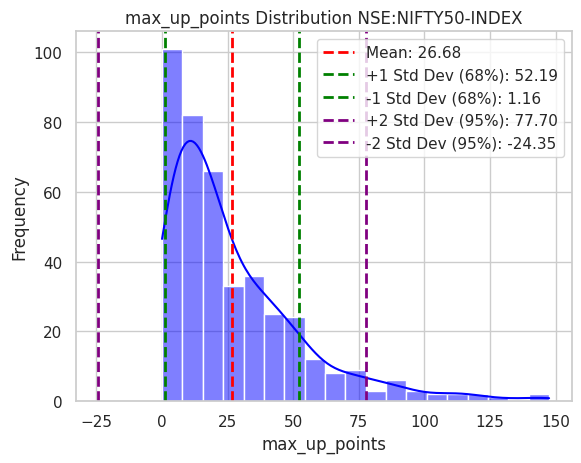

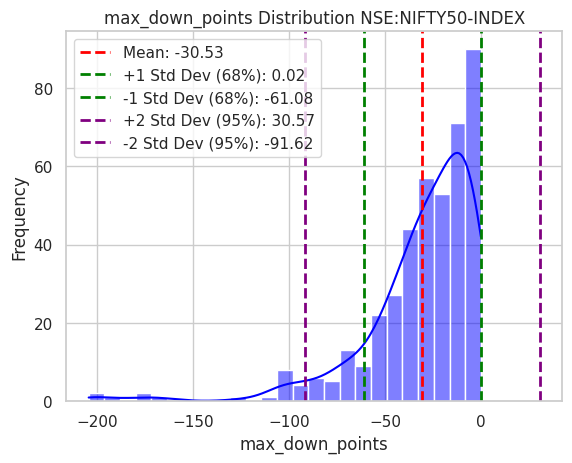

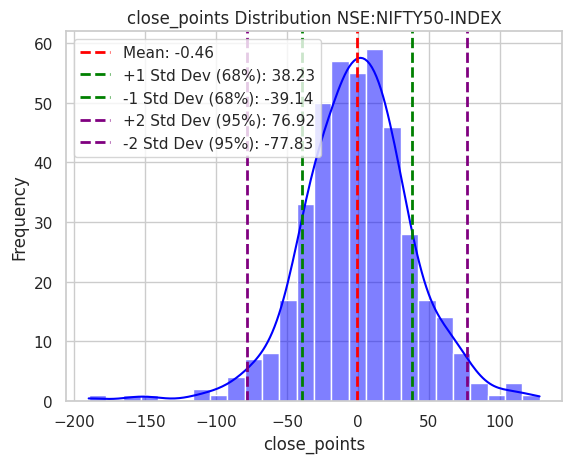

In [34]:
for parameter in ['max_up_points', 'max_down_points', 'close_points']:
    # Create a distribution plot
    sns.set(style="whitegrid")
    ax = sns.histplot(df[parameter], kde=True, color='blue')

    # Calculate the mean and standard deviation
    mean = df[parameter].mean()
    std_dev = df[parameter].std()

    # Add lines for 1 and 2 standard deviations with labels
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean: {:.2f}'.format(mean))
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label='+1 Std Dev (68%): {:.2f}'.format(mean + std_dev))
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2, label='-1 Std Dev (68%): {:.2f}'.format(mean - std_dev))
    plt.axvline(mean + 2 * std_dev, color='purple', linestyle='dashed', linewidth=2, label='+2 Std Dev (95%): {:.2f}'.format(mean + 2 * std_dev))
    plt.axvline(mean - 2 * std_dev, color='purple', linestyle='dashed', linewidth=2, label='-2 Std Dev (95%): {:.2f}'.format(mean - 2 * std_dev))

    # Add labels and legend
    plt.xlabel(parameter)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{parameter} Distribution {symbol}')

    # Show the plot
    plt.show()
